In [1]:
from glob import glob

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16 as pretraindedModel, preprocess_input

In [28]:
from tensorflow.keras.layers import Dense, Flatten

In [29]:
from tensorflow.keras.models import Model

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
trainpath= 'data2/train'
testpath = 'data2/test'

In [9]:
imagesize=[80,80]

In [10]:
imagefiles= glob(trainpath + '/*/*.jpg')

In [12]:
validimagefiles= glob(testpath + '/*/*.jpg')

In [13]:
folders=glob(trainpath + '/*')

In [15]:
import matplotlib.pyplot as plt

In [16]:
from tensorflow.keras.preprocessing import image

In [17]:
import numpy as np

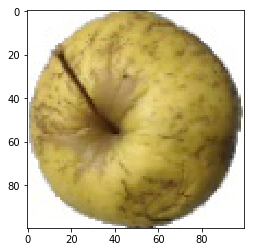

In [20]:
plt.imshow(image.load_img(np.random.choice(imagefiles)))

In [24]:
ptm = pretraindedModel(

input_shape = imagesize + [3],

weights = 'imagenet',

    include_top=False




)

In [25]:
ptm.trainable=False

In [26]:
k=len(folders)

In [37]:
x = Flatten()(ptm.output)
x= Dense(k , activation= 'softmax')(x)

In [38]:
model = Model(inputs = ptm.inputs, outputs = x)

In [41]:
gen = ImageDataGenerator(

rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    preprocessing_function = preprocess_input




)

In [42]:
batchsize=128

In [43]:
traingen= gen.flow_from_directory(


trainpath,
    shuffle=True,
    target_size=imagesize,
    batch_size=batchsize



)

Found 2449 images belonging to 5 classes.


In [44]:
testgen= gen.flow_from_directory(


testpath,
    shuffle=True,
    target_size=imagesize,
    batch_size=batchsize



)

Found 817 images belonging to 5 classes.


In [45]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
r= model.fit_generator(traingen, validation_data=testpath, epochs= 4, steps_per_epoch=int(np.ceil(len(imagefiles)/batchsize)), validation_steps=int(np.ceil(len(validimagefiles)/batchsize)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/4
